# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [4]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0, test_size=0.3)

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [5]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=1)

cv_knn_base = cross_validate(model_knn, X_scaled, y_train, cv=5)

score_knn_base = cv_knn_base['test_score'].mean()
score_knn_base

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model_knn = KNeighborsRegressor()

# Hyperparameter Grid
k_grid = {'n_neighbors': [1,5,10,20,50]}

# Instantiate Grid Search
grid = GridSearchCV(model_knn, k_grid, n_jobs=-1, cv=5)

# Fit data to Grid Search
grid.fit(X_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [8]:
# YOUR CODE HERE
grid.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [9]:
# YOUR CODE HERE
grid.best_score_

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [10]:
# Instantiate model
model_knn = KNeighborsRegressor()

# Hyperparameter Grid
k_grid = {'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

# Instantiate Grid Search
grid = GridSearchCV(model_knn, k_grid, n_jobs=-1, cv=5)

# Fit data to Grid Search
grid.fit(X_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                         17, 18, 19]})

In [11]:
best_k = grid.best_params_['n_neighbors']

In [12]:
best_score  = grid.best_score_

***🧪 Test your code***

In [13]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-workflow/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [14]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate

n_neighbors = np.arange(1, 51)
scores = []

for x in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=x)
    scores.append(cross_validate(model, X_scaled, y_train, cv=10, n_jobs=-1)['test_score'].mean())

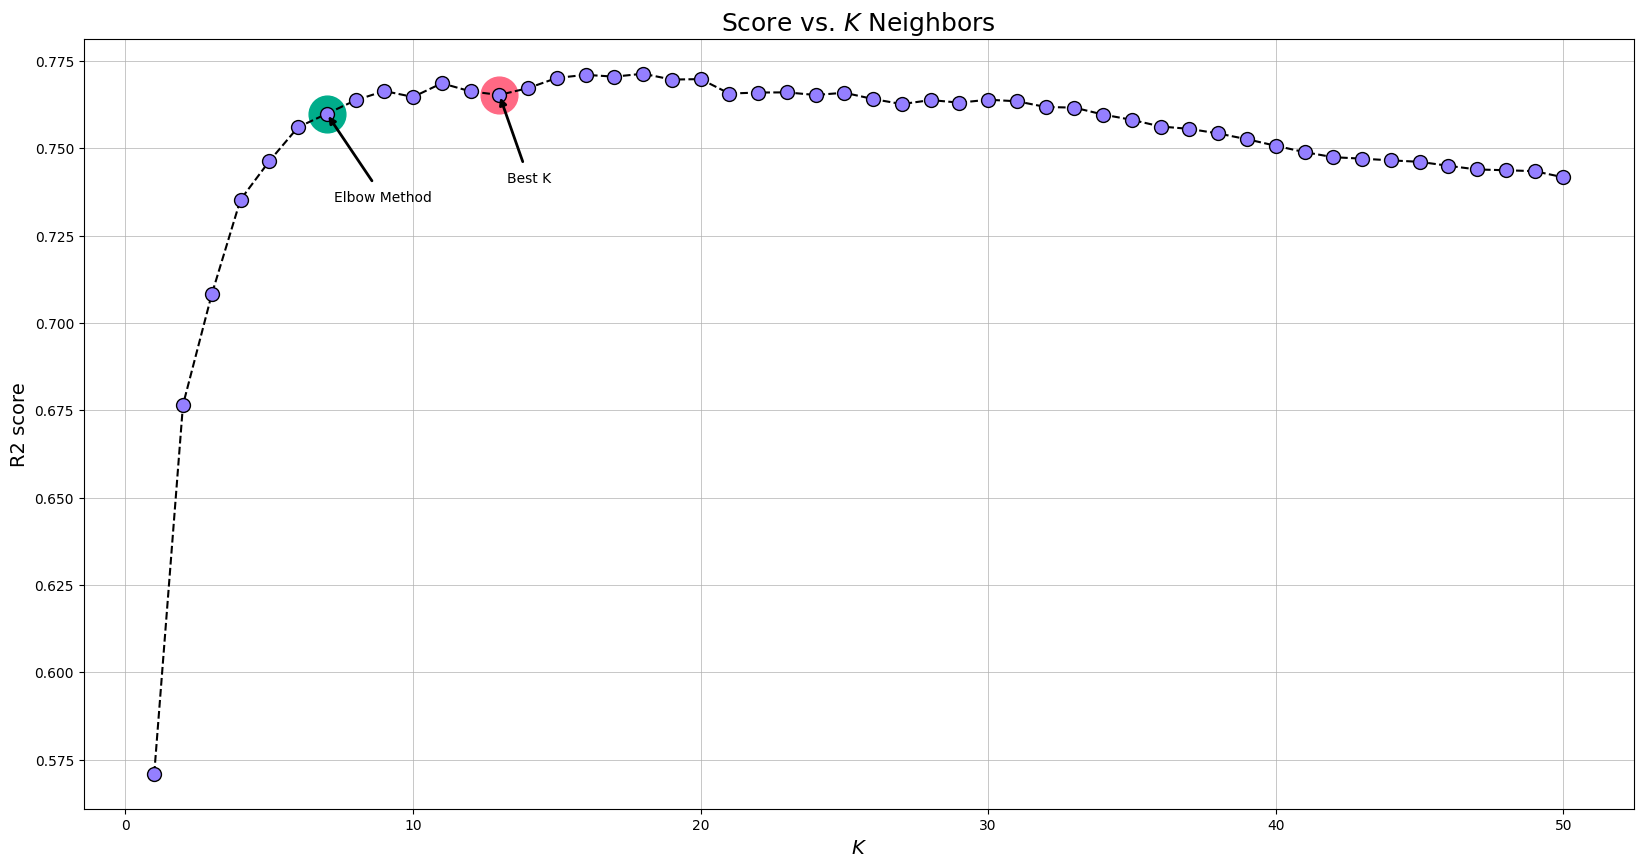

In [15]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(range(1,51),scores,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    # best K
    # focusing
    ax.scatter(7,scores[7-1],c='#00ad8b',s=700)
    ax.scatter(13,scores[13-1],c='#ff6984',s=700)
    
    # annotate
    ax.annotate("Elbow Method", 
                xy=(7,scores[7-1]),
                xytext=(7+0.25,scores[7-1]-0.025), 
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )
    
    ax.annotate("Best K", 
            xy=(13,scores[13-1]),
            xytext=(13+0.25,scores[13-1]-0.025), 
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )

    # spines
    
    
    plt.show()
    

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [16]:
# YOUR CODE HERE
model = KNeighborsRegressor()

k_p_grid = {'n_neighbors': [1,5,10,20,50], 'p': [1,2,3]}

grid = GridSearchCV(model, k_p_grid, n_jobs=-1, cv=5)

grid.fit(X_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]})

In [17]:
grid.best_params_

{'n_neighbors': 10, 'p': 1}

In [18]:
grid.best_score_

0.7969255879201194

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [50]:
# YOUR CODE HERE
75

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

# YOUR CODE HERE
The model that had the lowest error in metrics issues

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [26]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = KNeighborsRegressor()

search_space = {'n_neighbors': randint(1, 50), 'p': [1, 2, 3]}

search = RandomizedSearchCV(model, param_distributions=search_space,
                            n_jobs=-1,  cv=5, n_iter=15, scoring='r2')

search.fit(X_scaled, y_train)

print(search.best_score_)
print(search.best_params_)

0.7926134438965056
{'n_neighbors': 11, 'p': 1}


## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [27]:
# YOUR CODE HERE
best_model = search.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=11, p=1)

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [28]:
# YOUR CODE HERE
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005348,0.000522,0.065922,0.025923,22,1,"{'n_neighbors': 22, 'p': 1}",0.768409,0.811100,0.721044,0.822713,0.761557,0.776964,0.036595,3
1,0.004924,0.000416,0.006498,0.000291,6,2,"{'n_neighbors': 6, 'p': 2}",0.684716,0.798888,0.712586,0.861198,0.697898,0.751057,0.068008,6
2,0.004829,0.001244,0.114451,0.002798,18,3,"{'n_neighbors': 18, 'p': 3}",0.726271,0.788325,0.699645,0.776736,0.693891,0.736973,0.038941,9
3,0.003971,0.000927,0.125355,0.008758,47,3,"{'n_neighbors': 47, 'p': 3}",0.703170,0.764138,0.643924,0.731228,0.650839,0.698660,0.046155,14
4,0.004006,0.000545,0.006228,0.001064,2,2,"{'n_neighbors': 2, 'p': 2}",0.584763,0.759324,0.621424,0.835414,0.573318,0.674849,0.104111,15
5,0.004602,0.000659,0.016602,0.006816,32,1,"{'n_neighbors': 32, 'p': 1}",0.761281,0.804732,0.719500,0.806181,0.736827,0.765704,0.035071,4
6,0.004191,0.000794,0.007077,0.000352,37,2,"{'n_neighbors': 37, 'p': 2}",0.731045,0.789914,0.688473,0.776315,0.708478,0.738845,0.038813,8
7,0.004619,0.001230,0.012210,0.002797,4,1,"{'n_neighbors': 4, 'p': 1}",0.668027,0.817927,0.758951,0.871304,0.842029,0.791648,0.072007,2
8,0.003543,0.000612,0.115882,0.002396,26,3,"{'n_neighbors': 26, 'p': 3}",0.718534,0.794854,0.680559,0.766065,0.686992,0.729401,0.044565,12
9,0.003561,0.000242,0.009412,0.000285,11,1,"{'n_neighbors': 11, 'p': 1}",0.762816,0.815302,0.726084,0.862879,0.795986,0.792613,0.046427,1


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [33]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, best_model.predict(scaler.transform(X_test)))
r2_test

/Users/bita/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


0.7704404184968551

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [30]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-workflow/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 FAILED                                       [100%]

=================================== FAILURES ===================================
________________________________ TestR2.test_r2 ________________________________

self = <tests.test_r2.TestR2 testMethod=test_r2>

    def test_r2(self):
>       self.assertGreater(self.result.r2_test, 0.72)
E       ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

test_r2.py:6: ValueError
=========================== short test summary info ============================
FAILED test_r2.py::TestR2::test_r2 - Va

🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!